In [81]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


ds = xr.open_dataset('../Desktop/ACCESS-G_2020-10-15_01Z_surface.nc')
ds
# ds.info()


<xarray.Dataset>
Dimensions:                  (time: 1, lat: 291, lon: 240, char_size: 4,
                              bnds: 2, soil_lvl: 4)
Coordinates:
  * char_size                (char_size) int32 0 1 2 3
    forecast_reference_time  (time) datetime64[ns] ...
    height                   float32 ...
    height_0                 float32 ...
  * lat                      (lat) float32 -9.785 -9.902 ... -43.65 -43.77
  * lon                      (lon) float32 112.6 112.8 112.9 ... 154.4 154.6
  * soil_lvl                 (soil_lvl) float32 0.1 0.35 1.0 3.0
  * time                     (time) datetime64[ns] 2020-10-15T01:00:00
    time_0                   (time) datetime64[ns] ...
Dimensions without coordinates: bnds
Data variables: (12/77)
    abl_ht                   (time, lat, lon) float32 ...
    accum_conv_rain          (time, lat, lon) float32 ...
    accum_conv_snow          (time, lat, lon) float32 ...
    accum_evap               (time, lat, lon) float32 ...
    accum_ls_rain            (time, lat, lon) float32 ...
    accum_ls_snow            (time, lat, lon) float32 ...
    ...                       ...
    valid_time               (time) int32 ...
    vis_precip               (time, lat, lon) float32 ...
    vwnd_strs                (time, lat, lon) float32 ...
    wndgust10m               (time, lat, lon) float32 ...
    wrtn_date                (time) int32 ...
    wrtn_time                (time) int32 ...
Attributes: (12/13)
    date_created:              2020-10-15T05:49:14
    expt_id:                   0001
    institution:               Australian Bureau of Meteorology
    license:                   The Bureau of Meteorology licences this data u...
    modl_vrsn:                 ACCESS-G
    source:                    ACCESS-G/GE3 v3.0.0
    ...                        ...
    stash_vocabulary:          http://reference.metoffice.gov.uk/um/stash
    summary:                   Global Numerical Weather Prediction Data
    title:                     ACCESS-Global Model Forecast
    Conventions:               CF-1.6 ACDD-1.3
    history:                   Thu Oct 15 17:36:21 2020: ncks -O -d lat,-43.8...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...

In [82]:
ds['av_vwnd10m']
#ds.SurfReflect_I2_1

KeyError: 'av_vwnd10m'

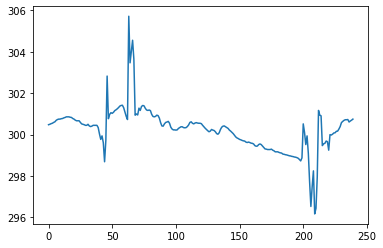

In [64]:
plt.plot(ds.temp_scrn.sel(time='2020-10-15T01:00:00',lat=-10.019531))
#(ds.SurfReflect_I2_1.sel(date='2020-09-27',longitude=112.625)).plot()

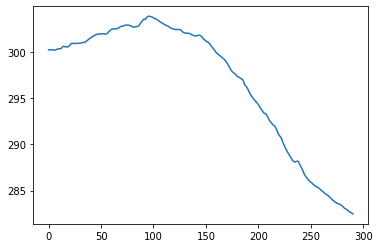

In [63]:
#2020-10-15,纬向平均值(mean of latitude)随经度(longitude)的变化
plt.plot(ds.temp_scrn.sel(time='2020-10-15T01:00:00').mean("lon"))
#(ds.SurfReflect_I2_1.sel(date='2020-09-27').mean("latitude")).plot.line()

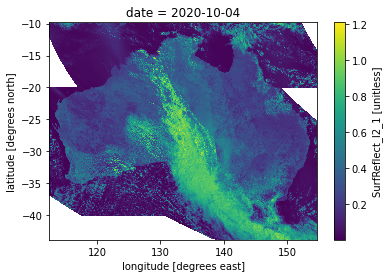

In [71]:
(ds.SurfReflect_I2_1.sel(date='2020-10-04T00:00:00.000000000')).plot()

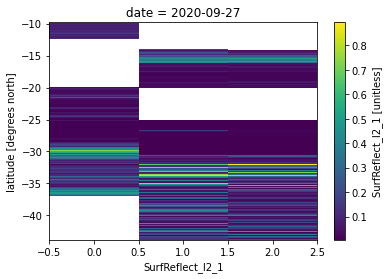

In [27]:
s = ds.SurfReflect_I2_1.sel(date='2020-09-27')

#找到三个经纬度点上的数据，分别取值
lons = xr.DataArray([112.575,154.575,154.675],dims='SurfReflect_I2_1')
lats = xr.DataArray([-43.825, -9.925,-9.825],dims='SurfReflect_I2_1')

s.sel( longitude=lons).plot()

In [152]:
ds.lat

<xarray.DataArray 'lat' (lat: 291)>
array([ -9.785156,  -9.902344, -10.019531, ..., -43.535156, -43.652344,
       -43.76953 ], dtype=float32)
Coordinates:
    height    float32 ...
    height_0  float32 ...
  * lat       (lat) float32 -9.785 -9.902 -10.02 -10.14 ... -43.54 -43.65 -43.77
Attributes:
    axis:           Y
    bounds:         lat_bnds
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitudes
    type:           uniform
    valid_max:      5.0
    valid_min:      -55.0

In [342]:
import pandas as pd
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# df=pd.DataFrame()
# ds = xr.open_dataset('/pollensource/weather/daily/ACCESS-G_2020-10-15_09Z_surface.nc')
# a=np.array(ds.data_vars)[:11]
# for i in a:
#     #d=xr.DataArray.to_numpy(ds["%s"%(i)].sel(time="2020-10-15",lat=-9.785156)).transpose()
#     #d=d["%s"%(i)]
#     d=xr.DataArray.to_dataframe(ds["%s"%(i)].sel(time="2020-10-15",lat=-9.902344))[["%s"%(i)]]
    
#     # df[i]=np.array(d)
#     # d=pd.DataFrame(d)
    
#     # df=pd.concat([df,d],axis=1)
#     df[i]=d

# # df.columns=a
# # d=xr.DataArray.to_dataframe(ds.abl_ht.sel(time="2020-10-15",lat=-9.785156))

# # delete nan
# #df=df.drop(df.columns[3],axis=1)
# df.head(50)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import pickle
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

# data=pickle.load(open('/Users/apple/Desktop/weather_v2.pkl','rb'))

d=pd.read_pickle('/Users/apple/Desktop/weather_v2.pkl')
mel_df=d[1]
df=mel_df.loc[mel_df.index>="2000-02-18"]
df1=df.loc[df.index<="2020-02-02"]

df2=pd.DataFrame()
ds = xr.open_dataset("/Users/apple/Desktop/evi_data.nc")
EVI=xr.DataArray.to_dataframe(ds["EVI"].sel(Latitude=-37.775,Longitude=144.975))
VI_Quality=xr.DataArray.to_dataframe(ds["VI_Quality"].sel(Latitude=-37.775,Longitude=144.975))
df2['EVI']=EVI['EVI']
df2['VI_Quality']=VI_Quality['VI_Quality']
pixel_reliability=xr.DataArray.to_dataframe(ds["pixel_reliability"].sel(Latitude=-37.775,Longitude=144.975))
df2['pixel_reliability']=pixel_reliability['pixel_reliability']
# plt.plot(df2['pixel_reliability'])
df2.head(10000)

df=pd.concat([df1,df2],axis=1)
# df=df.iloc[:,:15]
# df.head(10000)

# df.isnull().sum()
# drop rows with missing values
df = df.dropna()
print(df.columns)


/usr/local/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'EVI' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  new_vars[k] = decode_cf_variable(
/usr/local/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'EVI_std_dev' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  new_vars[k] = decode_cf_variable(


Index(['av_abl_ht', 'accum_prcp', 'av_lwsfcdown', 'av_mslp', 'av_qsair_scrn',
       'av_swsfcdown', 'av_temp_scrn', 'av_uwnd10m', 'av_vwnd10m',
       'av_wndgust10m',
       ...
       'thermal_time_90D', 'thermal_time_180D', 'soil_mois_1D',
       'soil_mois_10D', 'soil_mois_30D', 'soil_mois_90D', 'soil_mois_180D',
       'EVI', 'VI_Quality', 'pixel_reliability'],
      dtype='object', length=174)


In [62]:
# pps.score(df, "Total", "thermal_time_1D")
# pps.predictors(df, "y")
matrix = pps.matrix(df)
m=matrix.loc[matrix['ppscore']>0.5]
m

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,av_abl_ht,av_abl_ht,1.000000,predict_itself,True,None,0.000000,1.000000,None
13,av_abl_ht,av_abl_ht_sum,0.993583,regression,True,mean absolute error,7117.394338,45.674856,DecisionTreeRegressor()
83,av_abl_ht,av_abl_ht_sum_day,0.561678,regression,True,mean absolute error,5210.771939,2283.998016,DecisionTreeRegressor()
175,accum_prcp,accum_prcp,1.000000,predict_itself,True,None,0.000000,1.000000,None
188,accum_prcp,accum_prcp_sum,0.985884,regression,True,mean absolute error,1.764677,0.024910,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
29750,soil_mois_180D,soil_mois_180D,1.000000,predict_itself,True,None,0.000000,1.000000,None
29925,EVI,EVI,1.000000,predict_itself,True,None,0.000000,1.000000,None
30100,VI_Quality,VI_Quality,1.000000,predict_itself,True,None,0.000000,1.000000,None
30101,VI_Quality,pixel_reliability,0.982379,regression,True,mean absolute error,0.493478,0.008696,DecisionTreeRegressor()


<AxesSubplot:xlabel='x', ylabel='y'>

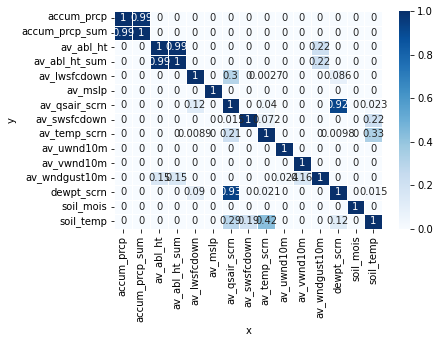

In [80]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)



<AxesSubplot:title={'center':'Correlation matrix'}>

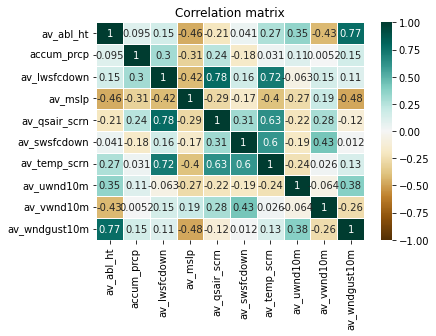

In [75]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax
corr_heatmap(df.corr())

In [70]:
from statsmodels.tsa.stattools import adfuller

for i in df.columns:
    a=adfuller(df[i])
    if a[1]>0.05:
        print(i)
       

soil_mois
soil_mois_sum
av_mslp_sum_afternoon
av_temp_scrn_sum_afternoon
dewpt_scrn_sum_afternoon
av_swsfcdown_numhours_10D
av_swsfcdown_sum_10D
av_swsfcdown_sum_30D
av_swsfcdown_sum_90D
forcing_temp_sum_180D
topt_numhours_90D
topt_sum_90D
soil_mois_1D
soil_mois_10D
soil_mois_30D
soil_mois_90D
soil_mois_180D


In [68]:
adfuller(df["soil_mois"])

(-1.3002786471519059,
 0.6290448226292361,
 1,
 7288,
 {'1%': -3.4312475857208686,
  '5%': -2.861936663242156,
  '10%': -2.566981139603197},
 17070.853148690287)

In [3]:
from statsmodels.tsa.stattools import grangercausalitytests
t=grangercausalitytests(df[[i,j]], maxlag=[3])
# t[3][0]['ssr_ftest'][1]
for i in df.columns:
    for j in df.columns:
        t=grangercausalitytests(df[[i,j]], maxlag=[3])
        if t[3][0]['ssr_ftest'][1]>0.05 and t[3][0]['ssr_ftest'][1]<1:
            print(i,j,t[3][0]['ssr_ftest'][1])


NameError: name 'i' is not defined

In [41]:
import pickle
import pandas as pd

data=pickle.load(open('/Users/apple/Desktop/weather_v2.pkl','rb'))

ds=pd.read_pickle('/Users/apple/Desktop/weather_v2.pkl')
df=ds[1]
df=df.loc[df.index>='2017-9-26']
df1=df.loc[df.index<='2021-1-31']
# print(ds[1])
# df=pd.DataFrame.from_dict(ds,orient='index')

df1['Count Date']=df1.index
df1['Count Date']=df1['Count Date'].astype('datetime64[ns]')
df1.head(6000)

/var/folders/t_/d7bhrc9n6k30xp0knk2bm6yr0000gn/T/ipykernel_51690/1027214435.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Count Date']=df1.index
/var/folders/t_/d7bhrc9n6k30xp0knk2bm6yr0000gn/T/ipykernel_51690/1027214435.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Count Date']=df1['Count Date'].astype('datetime64[ns]')


,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,av_vwnd10m,av_wndgust10m,...,thermal_time_10D,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D,Count Date
2017-09-26,567.409722,0.014479,291.515625,101588.000000,0.004978,85.603299,281.953993,1.618056,0.277778,5.041667,...,35.250000,87.500000,87.500000,486.375000,1792.332031,24080.046875,71414.628906,209709.917969,415718.011719,2017-09-26
2017-09-27,672.985000,0.044749,316.624375,101377.280000,0.004932,199.541875,285.437500,-1.055000,0.590000,4.555000,...,36.250000,89.250000,89.250000,487.500000,2489.031250,24086.992188,71454.339844,209820.257812,415804.148438,2017-09-27
2017-09-28,1351.370000,0.038105,320.018125,100350.040000,0.005645,184.114375,289.835625,2.420000,-1.575000,8.615000,...,36.500000,90.875000,90.875000,487.375000,2488.683594,24090.761719,71490.339844,209930.417969,415890.109375,2017-09-28
2017-09-29,896.015000,0.011231,318.508125,101197.400000,0.005693,178.778750,286.084375,3.255000,-0.600000,8.570000,...,36.125000,91.000000,91.000000,487.000000,2488.316406,24092.531250,71522.316406,210040.222656,415975.867188,2017-09-29
2017-09-30,1343.250000,0.055731,309.666466,101231.692308,0.005118,225.740385,287.077524,4.971154,-1.826923,12.798077,...,36.125000,91.125000,91.125000,487.500000,2587.183594,24192.238281,71650.304688,210248.914062,416160.636719,2017-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,834.791667,0.075095,352.086666,100960.166667,0.007849,130.549167,289.445415,-0.145833,4.887499,10.920833,...,75.999756,184.374908,184.374908,787.493103,7547.602417,76221.471649,229415.330170,692386.868195,961095.985832,2021-01-27
2021-01-28,963.125000,0.000219,335.512920,101483.541667,0.007803,334.555417,293.186250,-2.487500,2.991666,9.762500,...,76.049896,186.924896,186.924896,789.674408,7535.679962,76149.324097,229251.895264,692180.215698,967718.756729,2021-01-28
2021-01-29,896.600000,0.484703,395.593999,101408.280000,0.009936,132.476798,295.356401,-2.292000,-0.148000,5.888000,...,74.274933,185.274902,185.274902,790.161865,7836.774933,76074.451599,229086.352783,691967.418121,974334.436188,2021-01-29
2021-01-30,632.791667,0.407535,395.608746,100911.333333,0.011993,86.142084,292.612085,0.550000,-1.445833,7.416667,...,71.924927,182.549927,182.549927,789.127441,7542.737488,76027.771698,228949.192780,691782.330627,980975.300159,2021-01-30


In [40]:
d1=pd.read_csv('/Users/apple/Desktop/Grass.csv')
d2=pd.read_csv('/Users/apple/Desktop/Cupressaceae.csv')
d3=pd.read_csv('/Users/apple/Desktop/Oleaceae.csv')
d4=pd.read_csv('/Users/apple/Desktop/Myrtaceae.csv')
d5=pd.read_csv('/Users/apple/Desktop/Betula.csv')
d5=pd.read_csv('/Users/apple/Desktop/Alternaria.csv')
df2=d1.loc[d1['Location']==1]
# df2=d.set_index(index)
df2['Count Date']=df2['Count Date'].astype('datetime64[ns]')
df2.head(500)


/var/folders/t_/d7bhrc9n6k30xp0knk2bm6yr0000gn/T/ipykernel_51690/232512199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Count Date']=df2['Count Date'].astype('datetime64[ns]')


,Location,Count Date,Count,Sample Time,Total,QCL,Latitude,Longitude,Elevation,SchColTime,Name,NameMLFile,Continuation Location,State
0,1,2017-09-26,0.0,09:00:00,76.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
1,1,2017-09-27,0.0,09:00:00,335.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
2,1,2017-09-28,3.0,09:00:00,857.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
3,1,2017-09-29,0.0,09:00:00,235.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
4,1,2017-09-30,0.0,10:40:00,263.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1,2021-01-27,1.0,09:05:00,15.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
426,1,2021-01-28,7.0,09:00:00,40.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
427,1,2021-01-29,2.0,09:10:00,60.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC
428,1,2021-01-30,0.0,09:05:00,3.0,2.0,-37.797109,144.96488,28.0,09:00:00,Melbourne,MelbourneParkville,NaN,VIC


In [42]:
df=pd.merge(df2,df1,on='Count Date')

df=df.drop(['Location','QCL','Latitude','Longitude','Elevation','Continuation Location','Sample Time','SchColTime','Name','Count Date','State','NameMLFile'],axis=1)
df.head(500)

,Count,Total,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,...,thermal_time_1D,thermal_time_10D,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D
0,0.0,76.0,567.409722,0.014479,291.515625,101588.000000,0.004978,85.603299,281.953993,1.618056,...,3.625000,35.250000,87.500000,87.500000,486.375000,1792.332031,24080.046875,71414.628906,209709.917969,415718.011719
1,0.0,335.0,672.985000,0.044749,316.624375,101377.280000,0.004932,199.541875,285.437500,-1.055000,...,4.375000,36.250000,89.250000,89.250000,487.500000,2489.031250,24086.992188,71454.339844,209820.257812,415804.148438
2,3.0,857.0,1351.370000,0.038105,320.018125,100350.040000,0.005645,184.114375,289.835625,2.420000,...,3.500000,36.500000,90.875000,90.875000,487.375000,2488.683594,24090.761719,71490.339844,209930.417969,415890.109375
3,0.0,235.0,896.015000,0.011231,318.508125,101197.400000,0.005693,178.778750,286.084375,3.255000,...,2.750000,36.125000,91.000000,91.000000,487.000000,2488.316406,24092.531250,71522.316406,210040.222656,415975.867188
4,0.0,263.0,1343.250000,0.055731,309.666466,101231.692308,0.005118,225.740385,287.077524,4.971154,...,3.250000,36.125000,91.125000,91.125000,487.500000,2587.183594,24192.238281,71650.304688,210248.914062,416160.636719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1.0,15.0,834.791667,0.075095,352.086666,100960.166667,0.007849,130.549167,289.445415,-0.145833,...,3.375000,75.999756,184.374908,184.374908,787.493103,7547.602417,76221.471649,229415.330170,692386.868195,961095.985832
426,7.0,40.0,963.125000,0.000219,335.512920,101483.541667,0.007803,334.555417,293.186250,-2.487500,...,5.524994,76.049896,186.924896,186.924896,789.674408,7535.679962,76149.324097,229251.895264,692180.215698,967718.756729
427,2.0,60.0,896.600000,0.484703,395.593999,101408.280000,0.009936,132.476798,295.356401,-2.292000,...,3.924957,74.274933,185.274902,185.274902,790.161865,7836.774933,76074.451599,229086.352783,691967.418121,974334.436188
428,0.0,3.0,632.791667,0.407535,395.608746,100911.333333,0.011993,86.142084,292.612085,0.550000,...,2.424957,71.924927,182.549927,182.549927,789.127441,7542.737488,76027.771698,228949.192780,691782.330627,980975.300159


In [50]:
l=pps.predictors(df,'Count')
l=l.loc[l['ppscore']>0.01]
l

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,chilling_temp_sum_90D,Count,0.020894,regression,True,mean absolute error,28.271028,27.680345,DecisionTreeRegressor()


                                 Count
av_temp_scrn_max_day_3hfall  -0.366596
av_vwnd10m                   -0.339788
av_vwnd10m_sum               -0.336043
av_mslp_max_afternoon_1hfall -0.307344
av_abl_ht_max_day_3hfall     -0.300640
av_mslp_max_day_3hfall       -0.297740
Wind-South_total             -0.292936
chilling_temp_numhours_30D   -0.259139
Wind-South_mean              -0.234761
av_qsair_scrn_max_1h_fall    -0.216041
                                      Count
av_temp_scrn_min                   0.286153
av_abl_ht_sum_afternoon            0.308238
Wind-North_total                   0.309944
av_temp_scrn_max_afternoon_1hrise  0.311451
av_swsfcdown_sum_1D                0.341874
av_swsfcdown_sum                   0.341874
Wind-North_mean                    0.342842
av_swsfcdown                       0.347964
thermal_time_1D                    0.383433
av_temp_scrn_max_1h_rise           0.391295
av_temp_scrn_max_day_3hrise        0.406146
av_temp_scrn_max_afternoon         0.441165

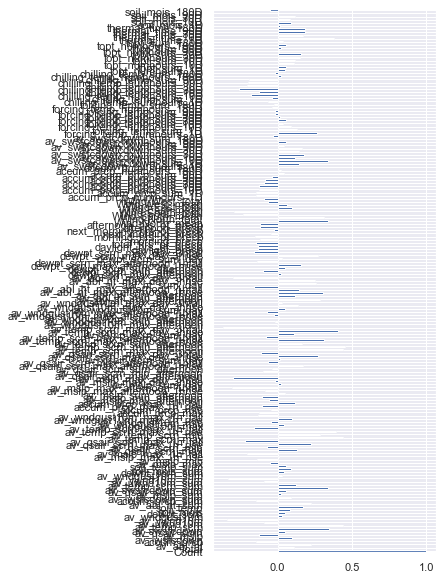

In [291]:
corr=df.corr()[['Count']].sort_values('Count')
df.corr().loc['Count'].plot(kind='barh',figsize=(4,10))
print(corr[:10])
print(corr.tail(16))


In [292]:
# drop numeric features  not correlation with the target (threshold <0.2)
corr = abs(df.corr().loc['Count'])
corr = corr[corr<0.2]
cols_to_drop = corr.index.to_list()
df = df.drop(cols_to_drop, axis=1)
df

,Count,av_abl_ht,av_swsfcdown,av_temp_scrn,av_vwnd10m,av_abl_ht_sum,av_swsfcdown_sum,av_vwnd10m_sum,av_mslp_max_1h_fall,av_qsair_scrn_max_1h_rise,...,dewpt_scrn_max_day_3hrise,Wind-North_mean,Wind-North_total,Wind-South_mean,Wind-South_total,av_swsfcdown_sum_1D,forcing_temp_numhours_1D,chilling_temp_numhours_30D,chilling_temp_sum_30D,thermal_time_1D
0,0.0,567.409722,85.603299,281.953993,0.277778,10213.375,1540.859375,5.000000,-81.0,0.000244,...,0.312500,1.180556,10.625000,2.232143,15.625000,1540.859375,0.0,9.0,4.146875,3.625000
1,0.0,672.985000,199.541875,285.437500,0.590000,16824.625,4988.546875,14.750000,-122.0,0.000488,...,2.875000,0.758929,10.625000,2.306818,25.375000,4988.546875,0.0,9.0,4.146875,4.375000
2,3.0,1351.370000,184.114375,289.835625,-1.575000,33784.250,4602.859375,-39.375000,-183.0,0.000732,...,4.703125,1.914773,42.125000,0.916667,2.750000,4602.859375,0.0,9.0,4.146875,3.500000
3,0.0,896.015000,178.778750,286.084375,-0.600000,22400.375,4469.468750,-15.000000,-26.0,0.000732,...,4.218750,2.173077,28.250000,1.104167,13.250000,4469.468750,0.0,9.0,4.146875,2.750000
4,0.0,1343.250000,225.740385,287.077524,-1.826923,34924.500,5869.250000,-47.500000,-81.0,0.000488,...,2.000000,2.738095,57.500000,2.000000,10.000000,5869.250000,0.0,6.0,3.415625,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1.0,834.791667,130.549167,289.445415,4.887499,20035.000,3133.180002,117.299980,0.0,0.000840,...,1.029999,0.000000,0.000000,4.887499,117.299980,3133.180002,0.0,0.0,0.000000,3.375000
426,7.0,963.125000,334.555417,293.186250,2.991666,23115.000,8029.329999,71.799993,-77.0,0.001241,...,3.730011,0.000000,0.000000,2.991666,71.799993,8029.329999,0.0,0.0,0.000000,5.524994
427,2.0,896.600000,132.476798,295.356401,-0.148000,22415.000,3311.919956,-3.700001,-103.0,0.001237,...,3.519989,0.542857,7.600001,0.433333,3.900000,3311.919956,0.0,0.0,0.000000,3.924957
428,0.0,632.791667,86.142084,292.612085,-1.445833,15187.000,2067.410020,-34.700000,-126.0,0.000390,...,1.239990,3.093333,46.400000,1.300000,11.700000,2067.410020,0.0,0.0,0.000000,2.424957


In [464]:
# # variance of numeric features
# (df
#  .select_dtypes(include=np.number)
#  .var()
#  .astype('str'))

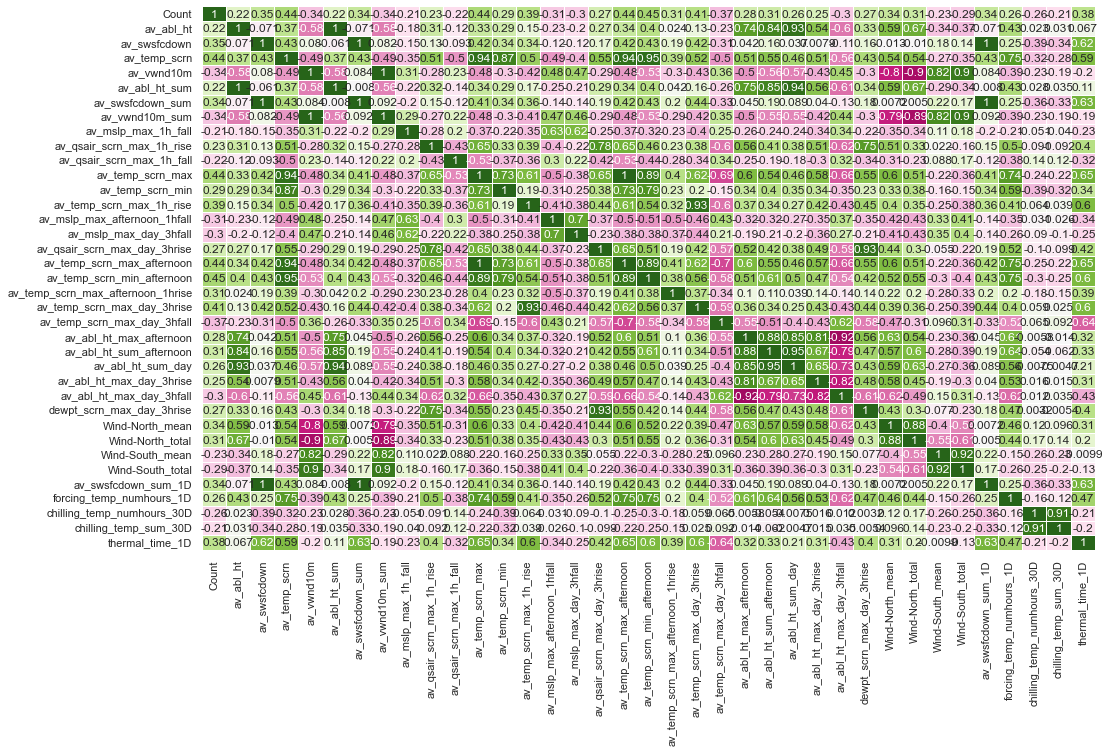

In [294]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

df.isnull().sum()
# drop rows with missing values
df = df.dropna()

# X features
X = df.drop('Count',axis=1)

# y target
y = df['Count']



In [7]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression

# select K best features
# X_proc=sklearn.preprocessing.MinMaxScaler().fit_transform(X,y)
X_best = SelectKBest(f_regression, k=14).fit_transform(X,y)
X_best=pd.DataFrame(X_best)
print(X_best)

             0           1         2            3           4           5   \
0     85.603299  281.953993  0.277778  1540.859375    5.000000  286.078125   
1    199.541875  285.437500  0.590000  4988.546875   14.750000  289.093750   
2    184.114375  289.835625 -1.575000  4602.859375  -39.375000  297.750000   
3    178.778750  286.084375 -0.600000  4469.468750  -15.000000  289.765625   
4    225.740385  287.077524 -1.826923  5869.250000  -47.500000  290.890625   
..          ...         ...       ...          ...         ...         ...   
421  130.549167  289.445415  4.887499  3133.180002  117.299980  292.019989   
422  334.555417  293.186250  2.991666  8029.329999   71.799993  298.670013   
423  132.476798  295.356401 -0.148000  3311.919956   -3.700001  299.309998   
424   86.142084  292.612085 -1.445833  2067.410020  -34.700000  295.089996   
425  275.843329  291.180419  3.920833  6620.239895   94.099999  294.480011   

           6           7           8         9          10     

In [14]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=4)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# normalizing
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

# convert back to dataframe
X_train = pd.DataFrame(X_train, columns = X_best.columns.to_list())
X_test = pd.DataFrame(X_test, columns = X_best.columns.to_list())


<font size=5>Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
# fit
model.fit(X_train, y_train)


LinearRegression()

<AxesSubplot:>

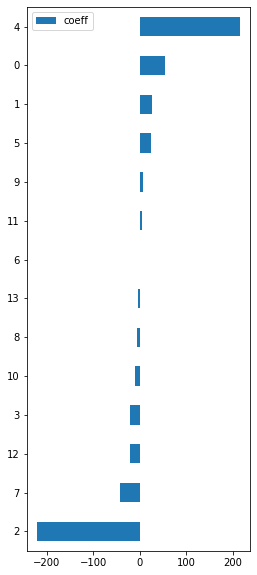

In [10]:
# feature coefficients
coeffs = model.coef_
coeffs

# visualizing coefficients
index = X_train.columns.tolist()

(pd.DataFrame(coeffs, index = index, columns = ['coeff']).sort_values(by = 'coeff')
 .plot(kind='barh', figsize=(4,10)))

In [11]:
# filter variables near zero coefficient value
temp = pd.DataFrame(coeffs, index = index, columns = ['coeff']).sort_values(by = 'coeff')
temp = temp[(temp['coeff']>1) | (temp['coeff']< -1)]

# drop features
cols_coeff = temp.index.to_list()
X_train = X_train[cols_coeff]
X_test = X_test[cols_coeff]

len(X_test.columns)

14

In [16]:
y_predict=model.predict(X_test).astype(int)
y_predict[y_predict<0]=0
y_predict

array([ 0, 43, 12, 63, 43, 70,  0,  3,  4, 28,  0, 70, 60, 72, 65,  8,  2,
       19, 64, 49, 58, 59, 86, 53,  7,  6, 11,  5, 10, 34, 61, 54, 43, 10,
       94, 55, 15, 11, 47, 62,  9,  3, 71,  9, 60, 18, 12, 22, 41, 31, 18,
       36,  0,  0, 33,  3, 58, 53, 40, 43,  8, 50, 24, 20, 90, 22,  8,  6,
       29, 16, 68, 34, 69, 12, 24, 52, 28, 63, 15, 30, 31, 12, 19, 44, 55,
        0])

In [18]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
#调用
# mean_squared_error(y_test,y_predict)
# mean_absolute_error(y_test,y_predict)
r2_score(y_test,y_predict)

# tabs = pd.crosstab(y_test,pred)
# tabs
# tabs=np.array(tabs)
# tabs.shape
# gerrity_score(tabs)

0.3927866761351464

In [19]:
import statsmodels.api as sm

ols = sm.OLS(y,X).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Count   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              7.157
Date:                Wed, 25 May 2022   Prob (F-statistic):                    1.63e-44
Time:                        14:42:10   Log-Likelihood:                         -1965.2
No. Observations:                 426   AIC:                                      4260.
Df Residuals:                     261   BIC:                                      4929.
Df Model:                         165                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [271]:
X=X.drop('Wind-North_total',axis=1)

<font size=5>Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# select K best features
for i in range(10,20):
    # select K best features
    X_best = SelectKBest(f_regression, k=i).fit_transform(X,y)
    X_best=pd.DataFrame(X_best)
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=4)
    model=RandomForestClassifier(n_estimators=260, random_state=0)
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test).astype(int)
    y_predict[y_predict<0]=0
    # y_predict
    score=cross_val_score(model,X_train,y_train)
    print("R2: ",r2_score(y_test,y_predict))
    print("cross:",score.mean())

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  -0.0006564974377061272
cross: 0.058823529411764705


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  0.02972284007649617
cross: 0.05588235294117647


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  -0.02144756248267532
cross: 0.07058823529411765


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  0.24905045413646065
cross: 0.05588235294117647


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  0.18568877730369393
cross: 0.05588235294117647


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  0.11137142831965585
cross: 0.058823529411764705


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  -0.06950973925857862
cross: 0.06764705882352942


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  -0.06391383453569865
cross: 0.058823529411764705


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  -0.14597429015296637
cross: 0.052941176470588235


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2:  -0.1939980259739531
cross: 0.06470588235294118


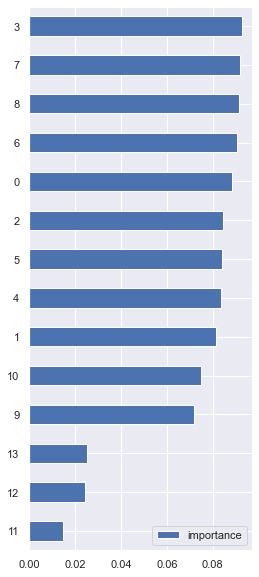

In [353]:
#  feature importance
importances = model.feature_importances_

# visualization
cols = X_best.columns
(pd.DataFrame(importances, cols, columns = ['importance'])
 .sort_values(by='importance', ascending=True)
 .plot(kind='barh', figsize=(4,10))
);

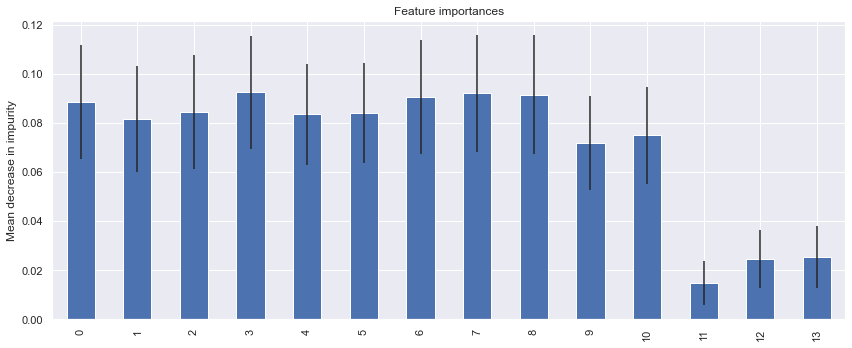

In [355]:
# calculate standard deviation of feature importances 
std = np.std([i.feature_importances_ for i in model.estimators_], axis=0)

# visualization
feat_with_importance  = pd.Series(importances, X_best.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<font size=5>SVM

In [23]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='poly')

In [399]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_predict)

In [24]:
y_predict=model.predict(X_test).astype(int)
y_predict[y_predict<0]=0
# y_predict
r2_score(y_test,y_predict)

-0.03178817935527878

<font size=5>KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)
y_predict=model.predict(X_test).astype(int)
y_predict[y_predict<0]=0
# model.score(X_test,y_test)
r2_score(y_test,y_predict)
# accuracy_score(y_test,y_predict)

0.12257422089539205

In [346]:
!pip3 install "xarray[io]"

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 961.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 2.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 2.2 MB/s eta 0:00:00a 0:00:01
  

In [105]:
import datetime
import numpy
from scipy import stats
from random import sample

#import pandas
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics

def gerrity_score(DAT, verbose = False):
    """Calculate the Gerrity score

    Based on R:verification:multi.cont

    Arguments:
        DAT: A contingency table of observed vs predicted counts. (numpy.ndarray)
             It is assumed that columns represent observation, rows represent forecasts
        verbose: Should extra information be printed? (bool)

    Returns:
        The Gerrity score (float)
    """
    ## consistency checks
    assert type(DAT) is numpy.ndarray, "Argument DAT should be a numpy array"
    assert len(DAT.shape) == 2, "Argument DAT should be a 2-D numpy array"
    assert DAT.shape[0] == DAT.shape[1], "Argument DAT should be a square matrix"
    assert DAT.shape[0] != 0, "Argument DAT should not be empty"
    DAT = DAT.astype(numpy.float)
    assert numpy.isfinite(DAT).all(),"All elements of DAT should be finite"
    assert DAT.min() >= 0, "No elements of DAT should be negative"
    assert type(verbose) is bool

    PDAT = DAT/DAT.sum()
    if verbose: print( 'PDAT',PDAT )
    pdiag = PDAT.diagonal()
    if verbose: print( 'pdiag',pdiag )
    PC = PDAT.diagonal().sum()
    if verbose: print( 'PC',PC )
    pforc = PDAT.sum(axis=1)
    if verbose: print( 'pforc',pforc )
    pobs = PDAT.sum(axis=0)
    if verbose: print( 'POBS',pobs )
    K = DAT.shape[0]
    if verbose: print( 'K',K )
    kap = 1./(K - 1.)
    pbase = pobs
    if verbose: print( 'kap',kap )

    b = 1./(K - 1.)
    if verbose: print( 'b',b )
    a = numpy.zeros(K)
    for k in range(K):
        a[k] = (1 - pbase[:(k+1)].sum())/pbase[:(k+1)].sum()

    if verbose: print( 'a',a )

    S = numpy.zeros(DAT.shape)
    for i in range(K):
        if i == 0:
            S[i, i] = b * a[:K].sum()
        elif i == K-1:
            S[i, i] = b * (1./a[:i]).sum()
        else:
            S[i, i] = b * ( (1./a[:i]).sum() + (a[i:K]).sum() )

    if verbose: print( 'S (diag)',S )

    for i in range(K-1):
        for j in range(i + 1,K):
            if i == 0 and j == K-1:
                S[i, j] = b * (i - j)
            elif i == 0 :
                S[i, j] = b * ( (i - j) + a[j:K].sum() )
                S[j, i] = S[i, j]
            elif j == K-1 :
                S[i, j] = b * ( (1./a[:i]).sum() + (i - j))
            else :
                S[i, j] = b * ( (1./a[:i]).sum() + (i - j) + a[j:K].sum() )
            ##
            S[j, i] = S[i, j]

    if verbose: print( 'S (off diag)',S )

    GS = (PDAT * S).sum()
    if verbose: print( "GS",GS )

    return GS

def stats_calc( obs, pred, levs, maximal, verbose=False ):
    ## make contingency table
    numlevels = len( levs )
    contingencyTAB = numpy.zeros((numlevels, numlevels), dtype = numpy.int)
    ## populate the contingency table
    for iFC,FC in enumerate(levs):
       for iOB,OB in enumerate(levs):
          ## rows correspond to forecast levels, columns correspond to observed levels
          contingencyTAB[iFC,iOB] = numpy.logical_and(pred == FC, obs == OB).sum()

    gs = gerrity_score(contingencyTAB, verbose=verbose)

    OK = numpy.logical_and( numpy.isin(obs, levs), numpy.isin(pred, levs) )
    obBool = (obs[OK]  == maximal)
    prBool = (pred[OK] == maximal)
    stats  = table_stats(obBool, prBool, fudge = 0.01, verbose=verbose)

    data = {
       'lvls'       : list(levs),
       'stats'      : stats,
       'gerrities'  : gs,
       'contingency': contingencyTAB.tolist() 
    }

    return data

def table_stats(obs, pred, fudge = 0.01, verbose = False):
    """Calculate the verification statistics for a 2 x 2 contingency table

    Based on R:verification:table.stats
    For definitions of the verification statistics, see 
    http://www.cawcr.gov.au/projects/verification/

    Arguments:
        obs: An array of bools or 0/1 integers representing the observations. (numpy.ndarray)
        pred: An array of bools or 0/1 integers representing the predictions. (numpy.ndarray)
        fudge: A numeric constant (AKA fudge factor) to be added to each cell of the contingency table in order to avoid division by zero.
        verbose: Should extra information be printed? (bool)

    Returns:
        A dictionary with the following components:
           'threat_score'             : Threat score a.k.a. Critical success index (CSI)
           'probability_of_detection' : Hit Rate aka probability of detection
           'miss_rate'                : Miss rate
           'false_alarm_rate'         : False Alarm RATE
           'false_alarm_ratio'        : False Alarm RATIO
           'Heidke_skill_score'       : Heidke Skill Score
           'Peirce_skill_score'       : Peirce Skill Score
           'Kuiper_skill_score'       : Kuiper's Skill Score
           'percent_correct'          : Percent correct - events along the diagonal
           'bias'                     : Bias
           'equitable_threat_score'   : Equitable Threat Score
           'odds_ratio'               : Odds Ratio
    """
    ## consistency checks
    #print( obs )
    defaultout = {
        'threat_score'             : -999,
        'probability_of_detection' : -999,
        'miss_rate'                : -999,
        'false_alarm_rate'         : -999,
        'false_alarm_ratio'        : -999,
        'success_ratio'            : -999,
        'Heidke_skill_score'       : -999,
        'Peirce_skill_score'       : -999,
        'Kuiper_skill_score'       : -999,
        'percent_correct'          : -999,
        'bias'                     : -999,
        'equitable_threat_score'   : -999,
        'odds_ratio'               : -999,
        'odds_ratio_skill_score'   : -999
    }

    if len(obs) != len(pred):
        print( "Error: Arguments obs and pred should be the same length" )
        return defaultout
    if len(obs) == 0:
        print( "Error: Arguments obs and pred should have non-zero length" )
        return defaultout
    allowedVals = numpy.array([0,1])
    for arg,argname in zip([obs,pred],['obs','pred']):
        if arg.dtype != 'bool':
            if not numpy.in1d(arg, allowedVals).all():
                print( "Error: Argument {} contained non-allowed values".format(argname))
                return defaultout
    ##
    #assert type(fudge) is float,"Argument fudge should be a float"
    #assert fudge > 0.0, "Argument fudge should be strictly positive"
    #assert fudge < 1.0, "Argument fudge should be less than 1.0"
    #assert type(verbose) is bool,"Argument verbose should be a bool"
    ##
    a = float( (obs                    & pred).sum() )   #hits
    b = float( (numpy.logical_not(obs) & pred).sum() )   #false alarms - false positives
    c = float( (obs                    & numpy.logical_not(pred)).sum() )  #misses - false negatives
    d = float( (numpy.logical_not(obs) & numpy.logical_not(pred)).sum() )  #true negatives
    if verbose: print( '[a,b,c,d]',[a,b,c,d] )
    n = float( a + b + c + d )
    if n == 0:
        n = fudge

    TS = a/(a + b + c + fudge)
    POD = a/(a + c + fudge)
    F = b/(b + d + fudge)
    M = c/(a + c + fudge)
    FAR = b/(a + b + fudge)
    HITSrandom =  (a + c) * (a + b)/n

    SR = a/( a + b + fudge )

    if (a + b + c - HITSrandom == 0):
        ETS = (a - HITSrandom)/fudge
    else:
        ETS = (a - HITSrandom)/(a + b + c - HITSrandom)

    HSS = 2. * (a * d - b * c)/((a + c) * (c + d) + (a + b) * (b + d) + fudge)
    PSS = 1. - M - F
    KSS = (a * d - b * c)/((a + c) * (b + d) + fudge)
    PC = (a + d)/(a + b + c + d + fudge)

    if (a + c == 0):
        BIAS = (a + b)/fudge
    else:
        BIAS = (a + b)/(a + c)

    if (b * c == 0):
        theta = a * d/fudge
    else:
        theta = (a * d)/(b * c)

    if ((a * d) + (b * c)) == 0:
        YUQ =  ((a * d) - (b * c))/fudge
    else:
        YUQ =  ((a * d) - (b * c))/((a * d) + (b * c))

    out = {'threat_score'             :    TS if not TS != TS else -999,
           'probability_of_detection' :   POD if not POD != POD else -999,
           'miss_rate'                :     M if not M != M else -999,
           'false_alarm_rate'         :     F if not F != F else -999,
           'false_alarm_ratio'        :   FAR if not FAR != FAR else -999,
           'success_ratio'            :    SR if not SR != SR else -999,
           'Heidke_skill_score'       :   HSS if not HSS != HSS else -999,
           'Peirce_skill_score'       :   PSS if not PSS != PSS else -999,
           'Kuiper_skill_score'       :   KSS if not KSS != KSS else -999,
           'percent_correct'          :    PC if not PC != PC else -999,
           'bias'                     :  BIAS if not BIAS != BIAS else -999,
           'equitable_threat_score'   :   ETS if not ETS != ETS else -999,
           'odds_ratio'               : theta if not theta != theta else -999,
           'odds_ratio_skill_score'   :   YUQ if not YUQ != YUQ else -999
           }

    return out

def simple_persistance( obs ):
    #simply shift the observations forward by a day  -> 1-day persistance
    pers = ['?']
    pers.extend( obs[:-1] )
    return numpy.array( pers )

def pearson_correlation( obs, pred ):
    pearson = numpy.corrcoef( obs, pred )[0,1]
    return pearson

def general_catstats( vector ):
    #add all your variables here for general stats
    mde = stats.mode( vector )
    freq = stats.itemfreq( vector )
    nums = len( vector )
    percs = [(f[0], f[1], round(int(f[1])*100/nums) ) for f in freq ]
    gen  = {
       'bins': percs,
       'sum' : nums
    }
    if mde[0] and mde[1]:
       gen.update({ 'modeclass': mde[0][0], 'modecount': mde[1][0] })
    return gen

def get_bootstrap( vector ):
    samsize = round( len(vector)/4 )
    test_mean = []; test_median = []; test_std = [];
    for i in range(100):
       smp = sample( vector, samsize )
       test_mean.append( numpy.mean(smp) )
       test_median.append( numpy.median(smp) )
       test_std.append( numpy.std(smp) )

    bmed  = numpy.median(test_median)
    bmean = numpy.mean(test_mean)
    bstd  = numpy.std(test_std)

    ci = stats.norm.interval(0.95, loc=bmean, scale=bstd )

    return ci[0], ci[1], bmean, bmed, bstd

def general_numstats( vector ):
    nobs, minmax, mean, variance, skewness, kurtosis = stats.describe( vector )
    std = numpy.std(vector)

    ci = None
    if len( vector ) > 5:
        ci = get_bootstrap( vector )
    gen = {
        'numobs': nobs,
        'min' : minmax[0],
        'max' : minmax[1],
        'mean': mean,
        'std' : std,
        'geometric_mean': stats.gmean( vector ),
        'harmonic_mean' : stats.hmean( vector ),
        'median': numpy.median( vector ),
        'variance': variance,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'ci95': ci
    }
    return gen

def eventdetection_stats( obsl, predl, order, maximal, has_pers, verbose=False ):
    if len( obsl ) < 1 or len( predl ) < 1:
        return {}

    ##general stats
    ob_gen = general_catstats( obsl )
    pd_gen = general_catstats( predl )

    #convert over and above categories to maximal class
    maxpos = order.index( maximal )
    overlevs = [ l for i, l in enumerate( order ) if i > maxpos ]

    obs  = [ maximal if o in overlevs else o for o in obsl ]
    pred = [ maximal if p in overlevs else p for p in predl ]
    levs = [ l for l in order if l not in overlevs ]

    if verbose:
       print( 'Obs: ', obs, 'Preds: ',  pred, 'Lvls: ',  levs )

    obs  = numpy.array( obs )
    pred = numpy.array( pred )
    levs = numpy.array( levs )

    data = {
        'obs': obs, 'pred': pred,
        'obs_category': ob_gen,
        'pred_category': pd_gen,
        'stats': stats_calc( obs, pred, levs, maximal, verbose=verbose ),
    }

    if has_pers:
       pers_fc = simple_persistance( obs )
       data['pers_stats'] = stats_calc( obs, pers_fc, levs, maximal, verbose=verbose )

    return data

def cat_stats( obs, pred, cat, verbose=False ):
    #discarding nulls
    zps  = zip( obs, pred )
    zps  = [ x for x in zps if x[0]!='?' and x[1]!='?'] 
    obs  = [ x[0] for x in zps ]
    pred = [ x[1] for x in zps ]

    ##general stats
    ob_gen = general_catstats( obs )
    pd_gen = general_catstats( pred )

    #label encoding
    le = LabelEncoder()
    lvls = le.fit_transform( cat )
    pred = le.transform( pred )
    obs  = le.transform( obs )

    numlevels = len( lvls )
    contingencyTAB = numpy.zeros((numlevels, numlevels), dtype = numpy.int)
    ## populate the contingency table
    for iFC,FC in enumerate( lvls ):
       for iOB,OB in enumerate( lvls ):
          ## rows correspond to forecast levels, columns correspond to observed levels
          contingencyTAB[iFC,iOB] = numpy.logical_and(pred == FC, obs == OB).sum()

    cr        = sklearn.metrics.classification_report( obs, pred )
    mc        = sklearn.metrics.matthews_corrcoef( obs, pred )
    acs       = sklearn.metrics.accuracy_score( obs, pred )
    bcs       = sklearn.metrics.balanced_accuracy_score( obs, pred )
    fbp5m     = sklearn.metrics.fbeta_score( obs, pred, beta = 0.5, average='macro' )
    fb2m      = sklearn.metrics.fbeta_score( obs, pred, beta = 2, average='macro' )
    fbp5w     = sklearn.metrics.fbeta_score( obs, pred, beta = 0.5, average='weighted' )
    fb2w      = sklearn.metrics.fbeta_score( obs, pred, beta = 2, average='weighted' )
    f1m       = sklearn.metrics.f1_score( obs, pred, average='macro' )                   
    f1w       = sklearn.metrics.f1_score( obs, pred, average='weighted' )
    prec_m    = sklearn.metrics.precision_score( obs, pred, average='macro' )
    prec_wt   = sklearn.metrics.precision_score( obs, pred, average='weighted' )
    recall_m  = sklearn.metrics.recall_score( obs, pred, average='macro' )
    recall_wt = sklearn.metrics.recall_score( obs, pred, average='weighted' )
    ckappa    = sklearn.metrics.cohen_kappa_score( obs, pred )
    ahamml    = sklearn.metrics.hamming_loss( obs, pred )  
    chisq     = -999; p_val = -999; dof = -999;
    if len( obs ) >= 5 and len( pred ) >= 5:
        try:
            chisq, p_val, dof, _ = stats.chi2_contingency( contingencyTAB )
        except:
            pass

    gs = gerrity_score( contingencyTAB, verbose=False )

    out = {
       'obs': obs, 'pred': pred,
       'obs_category': ob_gen,
       'pred_category': pd_gen,
       'classification': {
          'confusion_matrix': contingencyTAB.tolist(),
          'gerrity_score': gs,
          'classification_report': cr.split('\n'),
          'matthews_correlation': mc,
          'accuracy_score': acs,
          'balanced_accuracy': bcs,
          'fbetap5_macro': fbp5m,
          'fbeta2_macro': fb2m,
          'fbetap5_wt': fbp5w,
          'fbeta2_wt': fb2w,
          'f1_macro': f1m,
          'f1_wt': f1w, 
          'precision_macro': prec_m,
          'precision_weighted': prec_wt,
          'recall_macro': recall_m,
          'recall_weighted': recall_wt,
          'cohen_kappa': ckappa,
          'hamming_loss': ahamml,
          'chi_square': ( chisq, p_val, dof )
       }
    }

    return out

def regression_stats( obs, pred, verbose=False ):

    #discarding nulls
    zps  = zip( obs, pred )
    zps  = [ x for x in zps if x[0]!='?' and x[1]!='?']
    obs  = [ x[0] for x in zps ]
    pred = [ x[1] for x in zps ]

    obs  = list(map(float, obs))
    pred = list(map(float, pred))

    ##general stats
    ob_gen = general_numstats( obs )
    pd_gen = general_numstats( pred )

    slope = -999; intercept = -999
    me = r2 = mae = mse = rmse = mobs = bias = msle = -999; mape = -999;
    mde = mpd = mgd = pc = exp = bias = nb = nr = nm = spr = -999
    xb = [0,0]; yb = [0,0]
    if len( obs ) > 0 and len( pred ) > 0:
       me   = sklearn.metrics.max_error( obs, pred )
       mae  = sklearn.metrics.mean_absolute_error( obs, pred )
       mse  = sklearn.metrics.mean_squared_error( obs, pred )
       rmse = numpy.sqrt( mse )
       mobs = numpy.mean( obs )
       bias = mobs - numpy.mean( pred )
       msle = sklearn.metrics.mean_squared_log_error( obs, pred )
       mde  = sklearn.metrics.median_absolute_error( obs, pred )
       pc   = pearson_correlation( obs, pred ) if mobs else -999
       exp  = sklearn.metrics.explained_variance_score( obs, pred )
       r2   = sklearn.metrics.r2_score( obs, pred ) if mobs else -999 
       nb   = bias / mobs if mobs else -999
       nr   = rmse / mobs if mobs else -999
       nm   = mae / mobs if mobs else -999
       spr, _ = stats.spearmanr( obs, pred )
       if sum( obs ) > 0: 
          mape = numpy.mean( numpy.abs((numpy.array(obs) - numpy.array(pred)) / obs) ) * 100
       if mobs:
          slope, intercept, _, _, _ = stats.linregress( obs, pred )
          xb = [ 0, 200 ]
          yb = [ intercept, slope*200+intercept ]
        
    out = {
        'obs': obs, 'pred': pred, 
        'obs_numerical': ob_gen,
        'pred_numerical': pd_gen,
        'regression': {
           'explained_variance_score': exp,
           'max_error': me,
           'mean_absolute_error': mae,
           'mean_abs_perc_error': mape,
           'mean_squared_error' : mse,
           'root_mean_squared_error': rmse,
           'mean_squared_log_error' : msle,
           'median_absolute_error'  : mde,
           'r2_score': r2,
           'pearson_correlation'  : pc,
           'spearman_correlation' : spr,
           'bias': bias,
           'norm_bias': nb,
           'norm_rmse': nr,
           'norm_mae' : nm,
           'slope': slope,
           'intercept': intercept,
           'xb': xb, 
           'yb': yb
        }
    }

    return out

def bin_data( vls, bn, cats ):
    if len( vls ) < 1:
        return []

    minpt = min( vls ) - 1
    maxpt = max( vls ) + 1
    if minpt < bn[0]:
        bn.insert( 0, minpt )
    if maxpt > bn[-1]:
        bn.append( maxpt )
        
    digs = numpy.digitize( vls, bn )
    data = [ cats[ d-1 ] if d>0 else '?' for d in digs ]

    return data

